# Домашняя работа №3

**Срок сдачи:** 3 декабря 2017, 23:59 <br\>
Штраф за опоздание: -1 балл за каждый день

Файл с дз надо загрузить по [ссылке](https://www.dropbox.com/request/ygtyw9rRFTovCvtJu44k)<br/>
Постарайтесь назвать файл по следующему формату:** [ИАД-*{Номер}*] *{Фамилия}* *{Имя}* ДЗ*{Номер}* **<br/>

Сопровождайте ваш код изображеними, комментариями и выводами. <br/>
Иммейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.

Используйте данный Ipython Notebook при оформлении домашнего задания.

# Преамбула

Автоэнкодеры - это полносвязные сети, задачей которых является на выходе сети восстановить объекты, поданные на вход. Такие сети состоят из двух частей - енкодера и декодера. В каждом следующем слое энкодера становится всё меньше и меньше нейронов, в результате чего происходит "сжатие" исходной информации. В самом сжатом виде информация находится на последнем слое энкодера который называется bottleneck(с англ. бутылочное горлышко). Далее информация из bottleneck'a подаётся на вход декодеру, у которого наоборот с каждый следующим слоем количество нейронов становится больше и больше. Размерности выходов и входов такой нейронной сети совпадают. 

<img src="https://cdn-images-1.medium.com/max/1600/1*HIBRgSV2ePFtCSOF_lgPCQ.png">

Активации нейронов с самого узкого слоя можно использовать как довольно качественные признаки для передачи в другие модели машинного обучения.

Целью данного домашнего задания является реализация нескольких вариантов автокодировщиков, проведение экспериментов с целью определения структур, которые выучивают нейроны. 

In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


# Загрузка и предобработка данных(2.5 балла).

Загрузите *images.npy*. Данный файл содержит набор фото. 

In [2]:
import pickle as pkl
import numpy as np

images = np.load(open('images.npy', 'br'))

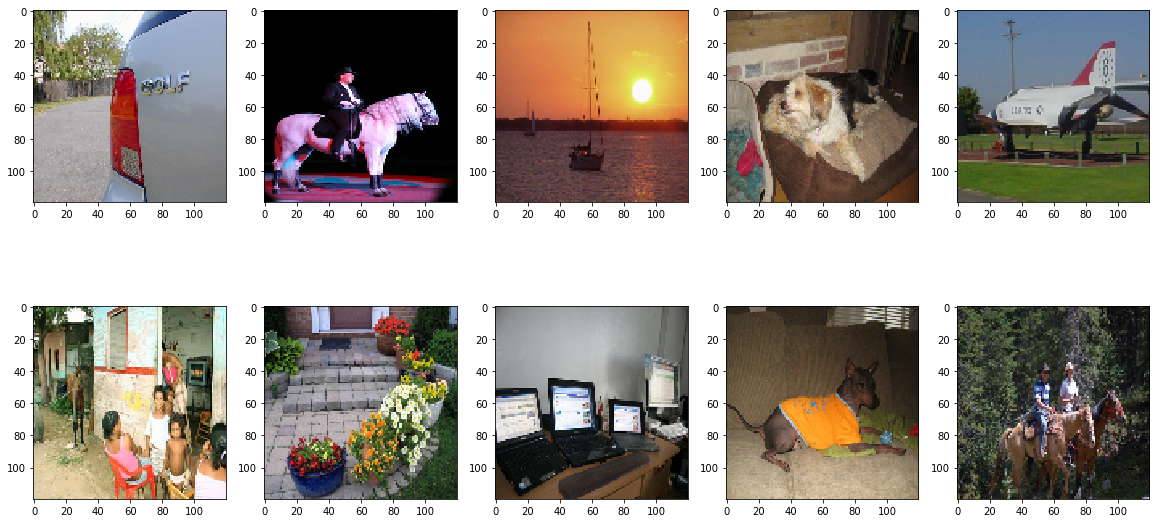

In [3]:
plt.figure(figsize=(20, 10))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i])

## Генерация датасета(2 балла)

Напишите функцию, которая принимает на вход исходный набор фотографий из возращает нужное количество "сэмплов" - случайных квадратных подкартинок нужного размера. Визуализируйте несколько сэмплов.

In [4]:
images.shape

(7000, 120, 120, 3)

## Meow. Котик

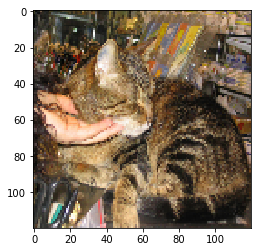

In [5]:
plt.imshow(images[366]);

#### Выведем картиночки относительного рандомного размера

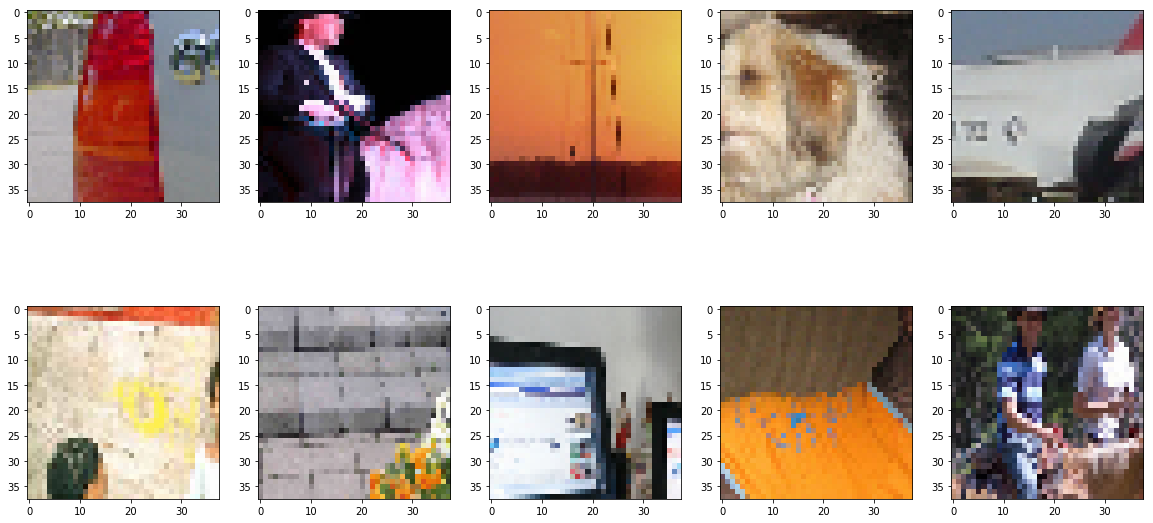

In [6]:
from random import randint

sample_size = randint(20, 40)
boundary = images.shape[1] - sample_size

height = randint(0,boundary+1)
width = randint(0,boundary+1)
h1 = height
h2 = height+sample_size
w1 = width
w2 = width+sample_size

plt.figure(figsize=(20, 10))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i][h1:h2, h1:h2])

In [7]:
from random import random
import random as random_module
from random import randrange
from random import randint

def get_samples(full_images, num_samples=10000, sample_size=16, rand_seed=123):
    
    # входные параметры
    # full_images: np.array, исходный датасет
    # num_samples: int, количество патчей, которые функция должна вернуть
    # sample_size: int, длина стороны каждого патча
    # rand_seed: int, число для инициализации np.random.seed, чтобы генерация датасета была воспроизводимой
    
    # выход функции
    # np.array размера [num_samples, sample_size, sample_size, 3]
    
    result = []
        
    #пытаемся выделить фрагмент    
    for img in (full_images[randrange(0, len(full_images))] for _ in range(num_samples)):
        boundary = img.shape[0] - sample_size
        
        #определяем границы участка
        height = randint(0,boundary)
        width = randint(0,boundary)
        h1 = height
        h2 = height+sample_size
        w1 = width
        w2 = width+sample_size
        
        #присваиваем фрагмент картинки переменной im
        im = img[h1:h2, w1:w2]
        
        result.append(im)  
        
    return np.array(result)

In [8]:
full_images = images
sample = get_samples(full_images, num_samples=10000, sample_size=16, rand_seed=123)
sample.shape

(10000, 16, 16, 3)

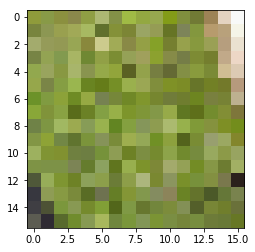

In [9]:
plt.imshow(sample[1]);

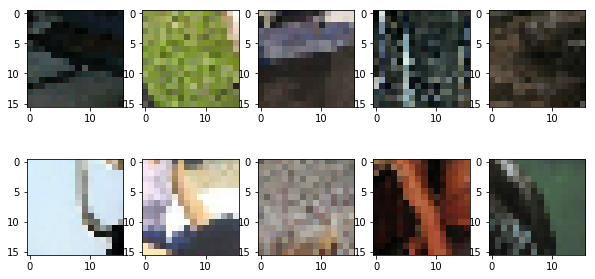

In [10]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(sample[i])

# ИИИИИИ!!!!! МОЯ МИЛЛИАРДНАЯ ПОПЫТКА ПОЧИНИТЬ КАКУЮ-ТО ДИЧЬ УСПЕШНА!!!! ТАДАДАДАААААММММ! 

![Image of Yaktocat](http://fotki.ykt.ru/albums/userpics/35295/42_snimok_1.png)

## Нормировка картинок и вытягивание их в один вектор(0.5 балл)

Переведите интенсивности каждого канала (R, G, B) в отрезок $[0.1, 0.9]$. Значения отбрасывать не надо, просто отшкалируйте каналы.

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
from copy import copy
imgs = copy(images)

In [13]:
scaler = MinMaxScaler(feature_range=(0.1,0.9))

transformed_imgs = []

for img in range(len(imgs)):
    original_image = imgs[img, :, :, :]
    as_columns = original_image.reshape(-1, 3)
    t = scaler.fit_transform(as_columns)
    transformed_image = t.reshape(original_image.shape)
    transformed_imgs.append(transformed_image)

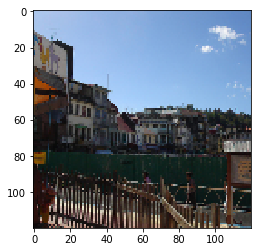

In [14]:
i = randint(1, 9999)
plt.imshow(imgs[i]);

### Бум! Картиночка стала менее четкой

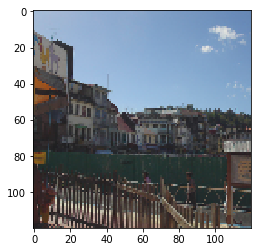

In [15]:
plt.imshow(transformed_imgs[i]);

Проверим на нескольких картинках

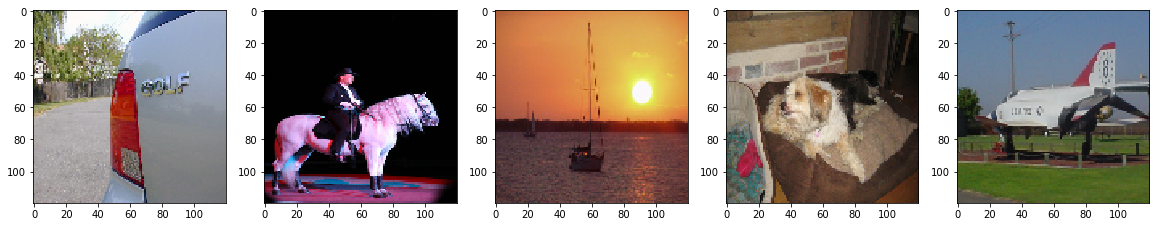

In [16]:
plt.figure(figsize=(20, 10))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(imgs[i])

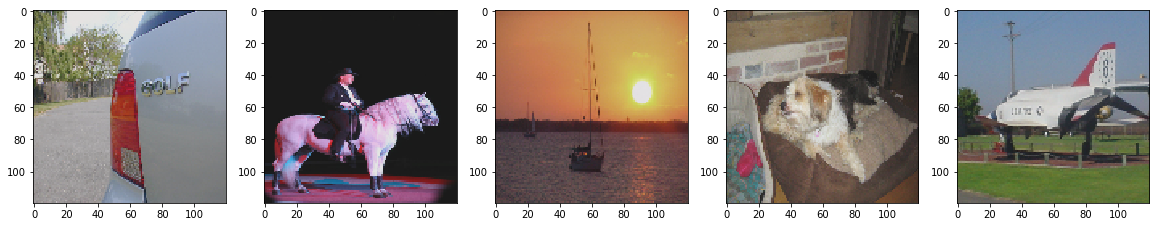

In [17]:
plt.figure(figsize=(20, 10))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(transformed_imgs[i])

Преобразуйте каждый семпл-матрицу в вектор.

То есть из исходного набора сэмплов размера [num_samples, sample_size, sample_size, 3] должен получиться набор размера [num_samples, sample_size x sample_size x 3].

In [18]:
full_images = transformed_imgs
sample_matrix = get_samples(full_images, num_samples=10000, sample_size=16, rand_seed=123)

In [19]:
sample_matrix.shape

(10000, 16, 16, 3)

In [20]:
16*16*3

768

In [21]:
sample_matrix = sample_matrix.reshape(10000, 768)
sample_matrix.shape

(10000, 768)

#### Предыдущий шаг изначально был сделан с помощью np.ravel(), но через reshape короче и проще, поэтому оставим второй вариант

# Реализация и обучение автокодировщика(4 балла)

### Построение автокодировщика(1.5 балла)

Напишите функцию, которая принимает параметры автокодировщика(размер входа и выхода, количества нейронов в каждом слое энкодера, количество нейронов в каждом слое декодера). Внутри автокодировщика использовать нелинейности-RELU. Но для выходов автоэнкодера использовать сигмоиду.

Выход функции - Keras модель, скомпилированная чтобы минимизировать MSE на трэйне. Оптимизатор - на ваш выбор.

In [22]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import adagrad

To build an autoencoder, you need three things: an encoding function, a decoding function, and a distance function between the amount of information loss between the compressed representation of your data and the decompressed representation (i.e. a "loss" function). The encoder and decoder will be chosen to be parametric functions (typically neural networks), and to be differentiable with respect to the distance function, so the parameters of the encoding/decoding functions can be optimize to minimize the reconstruction loss, using Stochastic Gradient Descent. It's simple! And you don't even need to understand any of these words to start using autoencoders in practice.

## Попытаемся создать автокодировщик, но пока не оформляя его в функцию

In [23]:
object_size=sample_matrix.shape[1]
encoder_layer_shapes=[256, 144, 64]
decoder_layer_shapes=[200, 400]

#загружаем картинку
input_img = Input(shape=(object_size,))

#энкодер
encoded = Dense(encoder_layer_shapes[0], activation='relu')(input_img)
encoded = Dense(encoder_layer_shapes[1], activation='relu')(encoded)
encoded = Dense(encoder_layer_shapes[2], activation='relu')(encoded)
input_encoded = Input(shape=(encoder_layer_shapes[-1],))

#декодер
decoded = Dense(decoder_layer_shapes[0], activation='relu')(input_encoded)
decoded = Dense(decoder_layer_shapes[1], activation='relu')(decoded)
decoded = Dense(object_size, activation='sigmoid')(decoded)


encoder = Model(input_img, encoded, name='encoder')
decoder = Model(input_encoded, decoded, name='decoder')
autoencoder = Model(input_img, decoder(encoder(input_img)), name='autoencoder')

autoencoder.compile(optimizer='adagrad', loss='mean_squared_error', metrics=['mean_squared_error'])

In [24]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 768)               0         
_________________________________________________________________
encoder (Model)              (None, 64)                243152    
_________________________________________________________________
decoder (Model)              (None, 768)               401368    
Total params: 644,520
Trainable params: 644,520
Non-trainable params: 0
_________________________________________________________________


### В этом варианте в качестве слоев выступают модели, которые сами состоят из слоев. Можно было написать иначе:

In [25]:
#загружаем картинку
input_img = Input(shape=(object_size,))

#энкодер
encoded = Dense(encoder_layer_shapes[0], activation='relu')(input_img)
encoded = Dense(encoder_layer_shapes[1], activation='relu')(encoded)
encoded = Dense(encoder_layer_shapes[2], activation='relu')(encoded)

#декодер
decoded = Dense(decoder_layer_shapes[0], activation='relu')(encoded)
decoded = Dense(decoder_layer_shapes[1], activation='relu')(decoded)
decoded = Dense(object_size, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded, name='autoencoder')

autoencoder.compile(optimizer='adagrad', loss='mean_squared_error', metrics=['mean_squared_error'])

In [26]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 768)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               196864    
_________________________________________________________________
dense_8 (Dense)              (None, 144)               37008     
_________________________________________________________________
dense_9 (Dense)              (None, 64)                9280      
_________________________________________________________________
dense_10 (Dense)             (None, 200)               13000     
_________________________________________________________________
dense_11 (Dense)             (None, 400)               80400     
_________________________________________________________________
dense_12 (Dense)             (None, 768)               307968    
Total para

Насколько я поняла, нет принципиальной разницы между тем, какой из вариантов использовать для решения нашей задачи. Первый вариант выглядит интуитивно понятнее, зато второй сразу дает представление о каждом слое. В последствии, в задании с паттернами, проще работать с вариантом, когда есть только одна модель, состоящая из отдельных слоев.

### Теперь можем обучить автокодировщик на наших данных

Посмотрим, что будет при validation_data=(sample_matrix, sample_matrix)

In [27]:
from time import time
t1 = time()
autoencoder.fit(sample_matrix, sample_matrix,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(sample_matrix, sample_matrix))
t2 = time()
print("%s: %.2f" % ('Time spent:', t2-t1))

Train on 10000 samples, validate on 10000 samples
Epoch 1/50
10000/10000 [==============================] - 2s - loss: 0.0503 - mean_squared_error: 0.0503 - val_loss: 0.0423 - val_mean_squared_error: 0.0423
Epoch 2/50
10000/10000 [==============================] - 1s - loss: 0.0322 - mean_squared_error: 0.0322 - val_loss: 0.0235 - val_mean_squared_error: 0.0235
Epoch 3/50
10000/10000 [==============================] - 1s - loss: 0.0232 - mean_squared_error: 0.0232 - val_loss: 0.0221 - val_mean_squared_error: 0.0221
Epoch 4/50
10000/10000 [==============================] - 1s - loss: 0.0211 - mean_squared_error: 0.0211 - val_loss: 0.0196 - val_mean_squared_error: 0.0196
Epoch 5/50
10000/10000 [==============================] - 1s - loss: 0.0198 - mean_squared_error: 0.0198 - val_loss: 0.0214 - val_mean_squared_error: 0.0214
Epoch 6/50
10000/10000 [==============================] - 1s - loss: 0.0190 - mean_squared_error: 0.0190 - val_loss: 0.0182 - val_mean_squared_error: 0.0182
Epoch 7/

Вероятно, я забыла запустить следующую ячейку .-.

In [28]:
scores = autoencoder.evaluate(sample_matrix, sample_matrix)
print("%s: %.2f%%" % (autoencoder.metrics_names[1], scores[1]*100))
print("%s: %.2f" % ('Time spent:', t2-t1))

 9856/10000 [============================>.] - ETA: 0smean_squared_error: 1.05%
Time spent:: 92.15


#### Попробуем оформить автокодировщик в функцию и затем обучить на тренировочном подмножестве и проверить качество на тестовой выборке

### В общем. Я написала "общую" функцию, она ниже и она выглядит сложно, зато наверное ее можно использовать в других заданиях. Наверное можно было не заморачиваться и сделать без циклов, нооо нет.

In [29]:
def create_autoencoder_model_common(object_size, encoder_layer_shapes, decoder_layer_shapes):
    #подаем картинку на вход
    input_img = Input(shape=(object_size,))
    
    #энкодер
    
    #вообще я планировала прописать условия, когда len(encoder_layer_shapes)==0 и >0,
    #но вряд ли этот список будет пустым, поэтому рассматриваем только второй случай
    for i in range(len(encoder_layer_shapes)):
        if i == 0:
            encoded = Dense(encoder_layer_shapes[i], activation='relu')(input_img)
        else:
            encoded = Dense(encoder_layer_shapes[i], activation='relu')(encoded)
            
    input_encoded = Input(shape=(encoder_layer_shapes[-1],))
    
    #декодер
    if len(decoder_layer_shapes) == 0:
        decoded = Dense(object_size, activation='sigmoid')(input_encoded)
    
    else:
        for j in range(len(decoder_layer_shapes)):
            if j == 0:
                decoded = Dense(decoder_layer_shapes[j], activation='relu')(input_encoded)
            else:
                decoded = Dense(decoder_layer_shapes[j], activation='relu')(decoded)
    
        decoded = Dense(object_size, activation='sigmoid')(decoded)
        
    encoder = Model(input_img, encoded, name='encoder')
    decoder = Model(input_encoded, decoded, name='decoder')
    autoencoder = Model(input_img, decoder(encoder(input_img)), name='autoencoder')
    
    return autoencoder, encoder, decoder

In [30]:
autoencoder, encoder, decoder = create_autoencoder_model_common(object_size=768, encoder_layer_shapes=[256, 144, 64],
                                                                decoder_layer_shapes=[200, 400])

Разделите выборку из сэмплов на тренировочную выборку и валидационную отношении 90%-10%.

In [31]:
RANDOM_STATE = 42
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sample_matrix, sample_matrix, test_size=0.1,
                                                    random_state=RANDOM_STATE)

In [32]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((9000, 768), (9000, 768), (1000, 768), (1000, 768))

Обучите модель со стандартными параметрами.

In [33]:
t1 = time()
autoencoder.compile(optimizer='adagrad', loss='mean_squared_error', metrics=['mean_squared_error'])
autoencoder.fit(X_train, y_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, y_test))
t2 = time()

Train on 9000 samples, validate on 1000 samples
Epoch 1/50
9000/9000 [==============================] - 1s - loss: 0.0497 - mean_squared_error: 0.0497 - val_loss: 0.0435 - val_mean_squared_error: 0.0435
Epoch 2/50
9000/9000 [==============================] - 1s - loss: 0.0364 - mean_squared_error: 0.0364 - val_loss: 0.0280 - val_mean_squared_error: 0.0280
Epoch 3/50
9000/9000 [==============================] - 1s - loss: 0.0245 - mean_squared_error: 0.0245 - val_loss: 0.0232 - val_mean_squared_error: 0.0232
Epoch 4/50
9000/9000 [==============================] - 1s - loss: 0.0216 - mean_squared_error: 0.0216 - val_loss: 0.0209 - val_mean_squared_error: 0.0209
Epoch 5/50
9000/9000 [==============================] - 1s - loss: 0.0210 - mean_squared_error: 0.0210 - val_loss: 0.0210 - val_mean_squared_error: 0.0210
Epoch 6/50
9000/9000 [==============================] - 1s - loss: 0.0206 - mean_squared_error: 0.0206 - val_loss: 0.0198 - val_mean_squared_error: 0.0198
Epoch 7/50
9000/9000 [

In [34]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 768)               0         
_________________________________________________________________
encoder (Model)              (None, 64)                243152    
_________________________________________________________________
decoder (Model)              (None, 768)               401368    
Total params: 644,520
Trainable params: 644,520
Non-trainable params: 0
_________________________________________________________________


Ну давайте на энкодер и декодер тоже посмотрим

In [35]:
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 768)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               196864    
_________________________________________________________________
dense_14 (Dense)             (None, 144)               37008     
_________________________________________________________________
dense_15 (Dense)             (None, 64)                9280      
Total params: 243,152
Trainable params: 243,152
Non-trainable params: 0
_________________________________________________________________


In [36]:
decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 64)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 200)               13000     
_________________________________________________________________
dense_17 (Dense)             (None, 400)               80400     
_________________________________________________________________
dense_18 (Dense)             (None, 768)               307968    
Total params: 401,368
Trainable params: 401,368
Non-trainable params: 0
_________________________________________________________________


In [37]:
scores = autoencoder.evaluate(X_test, y_test)
print("%s: %.2f%%" % (autoencoder.metrics_names[1], scores[1]*100))
print("%s: %.2f" % ('Time spent:', t2-t1))

 928/1000 [==========================>...] - ETA: 0smean_squared_error: 1.18%
Time spent:: 66.11


#### О, затратилось намного меньше времени, чем в прошлый раз. Полагаю, это из-за размеров выборок, которые мы подавали на вход и на которых проверяли. В первый раз и обучающим и тестовым подмножеством была одна и та же большая выборка, в этот же раз она использовалась один раз, разделенная на 2 части

### Визуализация паттернов, которые находят нейроны(1.5 балла)

Возьмите несколько объектов из валидационной выборки и прогоните через автоэнкодер. Оцените визуально результат восстановления объектов.

### Моя функция слегка поменялась, и за час до дедлайна мой мозг отказывается придумывать новые способы решения

In [38]:
n = 10
X_test_auto = X_test[:n]

In [39]:
encoded_imgs = encoder.predict(X_test_auto, batch_size=n)
decoded_imgs = decoder.predict(encoded_imgs, batch_size=n)

encoded_imgs.shape, decoded_imgs.shape, X_test_auto.shape

((10, 64), (10, 768), (10, 768))

In [40]:
X_test_auto = X_test_auto.reshape(10, 16, 16, 3)
decoded_imgs = decoded_imgs.reshape(10, 16, 16, 3)

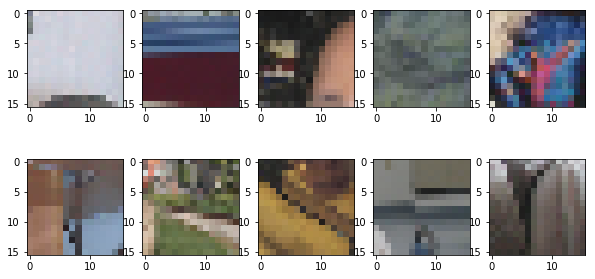

In [41]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test_auto[i])

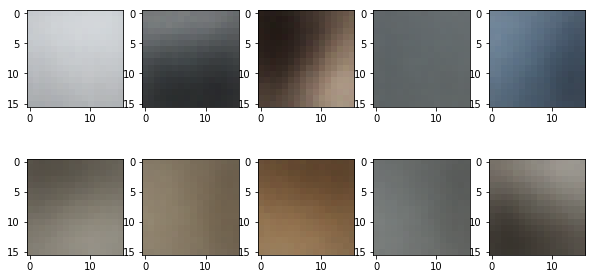

In [42]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(decoded_imgs[i])

Но что если попробовать опираться только на автоэнкодер? Напишу функцию, которая возвращает только одну модель

In [43]:
def create_autoencoder_model(object_size, encoder_layer_shapes, decoder_layer_shapes):
    #подаем картинку на вход
    input_img = Input(shape=(object_size,))
    
    #энкодер
    
    #вообще я планировала прописать условия, когда len(encoder_layer_shapes)==0 и >0,
    #но вряд ли этот список будет пустым, поэтому рассматриваем только второй случай
    for i in range(len(encoder_layer_shapes)):
        if i == 0:
            encoded = Dense(encoder_layer_shapes[i], activation='relu')(input_img)
        else:
            encoded = Dense(encoder_layer_shapes[i], activation='relu')(encoded)
            
    #декодер
    if len(decoder_layer_shapes) == 0:
        decoded = Dense(object_size, activation='sigmoid')(encoded)
    
    else:
        for j in range(len(decoder_layer_shapes)):
            if j == 0:
                decoded = Dense(decoder_layer_shapes[j], activation='relu')(encoded)
            else:
                decoded = Dense(decoder_layer_shapes[j], activation='relu')(decoded)
    
        decoded = Dense(object_size, activation='sigmoid')(decoded)
        
    autoencoder = Model(input_img, decoded, name='autoencoder')
    
    return autoencoder

In [44]:
autoenc = create_autoencoder_model(object_size=768, encoder_layer_shapes=[256, 144, 64],
                                   decoder_layer_shapes=[200, 400])

In [45]:
t1 = time()
autoenc.compile(optimizer='adagrad', loss='mean_squared_error', metrics=['mean_squared_error'])
autoenc.fit(X_train, y_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, y_test))
t2 = time()

Train on 9000 samples, validate on 1000 samples
Epoch 1/50
9000/9000 [==============================] - 1s - loss: 0.0522 - mean_squared_error: 0.0522 - val_loss: 0.0443 - val_mean_squared_error: 0.0443
Epoch 2/50
9000/9000 [==============================] - 1s - loss: 0.0403 - mean_squared_error: 0.0403 - val_loss: 0.0340 - val_mean_squared_error: 0.0340
Epoch 3/50
9000/9000 [==============================] - 1s - loss: 0.0280 - mean_squared_error: 0.0280 - val_loss: 0.0288 - val_mean_squared_error: 0.0288
Epoch 4/50
9000/9000 [==============================] - 1s - loss: 0.0231 - mean_squared_error: 0.0231 - val_loss: 0.0229 - val_mean_squared_error: 0.0229
Epoch 5/50
9000/9000 [==============================] - 1s - loss: 0.0218 - mean_squared_error: 0.0218 - val_loss: 0.0214 - val_mean_squared_error: 0.0214
Epoch 6/50
9000/9000 [==============================] - 1s - loss: 0.0209 - mean_squared_error: 0.0209 - val_loss: 0.0209 - val_mean_squared_error: 0.0209
Epoch 7/50
9000/9000 [

In [46]:
scores = autoenc.evaluate(X_test, y_test)
print("%s: %.2f%%" % (autoenc.metrics_names[1], scores[1]*100))
print("%s: %.2f" % ('Time spent:', t2-t1))

 608/1000 [=================>............] - ETA: 0smean_squared_error: 1.07%
Time spent:: 65.32


Для каждого слоя и для каждого нейрона на этом слое найдите объект из тренировочной выборки, на котором этот нейрон выдаёт наибольшую активацию. Если нейрон ни на одном объекте не активировался, пропустите изображение для него. Что можете сказать про сложность шаблонов на объектах для каждого слоя?

Пожалуй, выведу саммари всех моделей

In [47]:
autoenc.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 768)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)               196864    
_________________________________________________________________
dense_20 (Dense)             (None, 144)               37008     
_________________________________________________________________
dense_21 (Dense)             (None, 64)                9280      
_________________________________________________________________
dense_22 (Dense)             (None, 200)               13000     
_________________________________________________________________
dense_23 (Dense)             (None, 400)               80400     
_________________________________________________________________
dense_24 (Dense)             (None, 768)               307968    
Total para

In [48]:
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 768)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               196864    
_________________________________________________________________
dense_14 (Dense)             (None, 144)               37008     
_________________________________________________________________
dense_15 (Dense)             (None, 64)                9280      
Total params: 243,152
Trainable params: 243,152
Non-trainable params: 0
_________________________________________________________________


In [49]:
decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 64)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 200)               13000     
_________________________________________________________________
dense_17 (Dense)             (None, 400)               80400     
_________________________________________________________________
dense_18 (Dense)             (None, 768)               307968    
Total params: 401,368
Trainable params: 401,368
Non-trainable params: 0
_________________________________________________________________


In [50]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 768)               0         
_________________________________________________________________
encoder (Model)              (None, 64)                243152    
_________________________________________________________________
decoder (Model)              (None, 768)               401368    
Total params: 644,520
Trainable params: 644,520
Non-trainable params: 0
_________________________________________________________________


In [51]:
from keras import backend as K

# with a Sequential model
get_1st_layer_output = K.function([encoder.layers[0].input],
                                  [encoder.layers[1].output])
layer_output_1 = get_1st_layer_output([X_test])[0]
layer_output_1.shape, layer_output_1.max()

((1000, 256), 19.912971)

In [52]:
get_2nd_layer_output = K.function([encoder.layers[0].input],
                                  [encoder.layers[2].output])
layer_output_2 = get_2nd_layer_output([X_test])[0]
layer_output_2.shape, layer_output_2.max()

((1000, 144), 6.5555902)

In [53]:
get_3rd_layer_output = K.function([encoder.layers[0].input],
                                  [encoder.layers[3].output])
layer_output_3 = get_3rd_layer_output([X_test])[0]
layer_output_3.shape, layer_output_3.max()

((1000, 64), 5.6904607)

In [54]:
max(layer_output_3[0])

4.7945757

Создам функцию, которая 

In [55]:
def newron_layer(layer_output_resh):
    maxs = []
    for newron in range(layer_output_resh.shape[0]):
        maximum = np.argmax(layer_output_resh[newron])
        maxs.append(maximum)
    maxs = np.array(maxs)
    return maxs

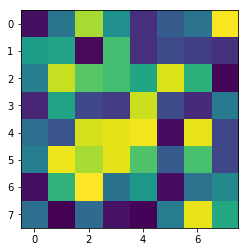

In [56]:
maxs_64 = newron_layer(layer_output_resh=layer_output_3.reshape(64, 1000))
plt.imshow(maxs_64.reshape(8, 8));

Да, да, я знаю, что это не то, но выглядит прикольно, поэтому оставлю

#### Нет, я не хочу убирать картиночки bottle_neck'а. Они такие... Как туса. Должна же у меня хоть где-то быть туса? 

In [57]:
maxs_64[1]

391

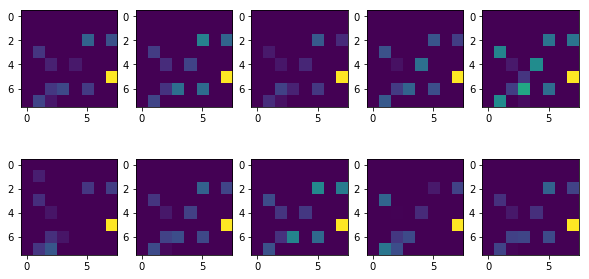

In [58]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(layer_output_3[maxs_64[i]].reshape(8, 8))

Но окей, теперь нормальные картинки

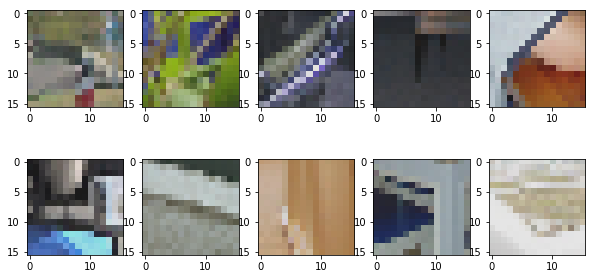

In [59]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[maxs_64[i]].reshape(16,16,3))

#### Не, все-таки попробую повторить это для слоя со 144 нейронами. Конечно, было бы интересно сравнить с картинками, индексы максимумов которых взяты на слоях декодера, а не энкодера, но так как у меня отдельные модели, а не одна с 6-7 слоями, будет трудновато 

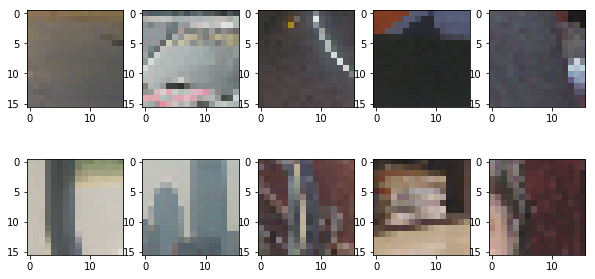

In [60]:
maxs_144 = newron_layer(layer_output_resh=layer_output_2.reshape(144, 1000))
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[maxs_144[i]].reshape(16,16,3))

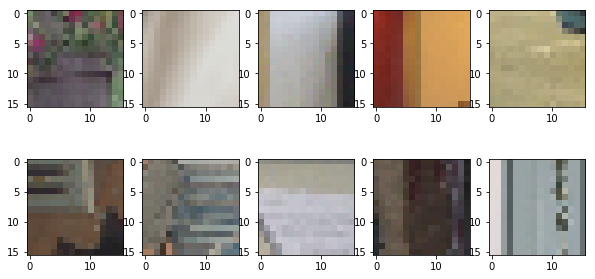

In [61]:
maxs_256 = newron_layer(layer_output_resh=layer_output_1.reshape(256, 1000))
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[maxs_256[i]].reshape(16,16,3))

Чет во вкус вошла... Но там дальше начинаются слои декодера, а у меня не получилось его запустить, поэтому я продолжу на autoenc

In [62]:
get_4th_layer_output = K.function([autoenc.layers[0].input],
                                  [autoenc.layers[4].output])
layer_output_4 = get_4th_layer_output([X_test])[0]
layer_output_4.shape, layer_output_4.max()

((1000, 200), 2.0019314)

In [63]:
get_5th_layer_output = K.function([autoenc.layers[0].input],
                                  [autoenc.layers[5].output])
layer_output_5 = get_5th_layer_output([X_test])[0]
layer_output_5.shape, layer_output_5.max()

((1000, 400), 5.3387027)

In [64]:
get_6th_layer_output = K.function([autoenc.layers[0].input],
                                  [autoenc.layers[6].output])
layer_output_6 = get_6th_layer_output([X_test])[0]
layer_output_6.shape, layer_output_6.max()

((1000, 768), 0.95015651)

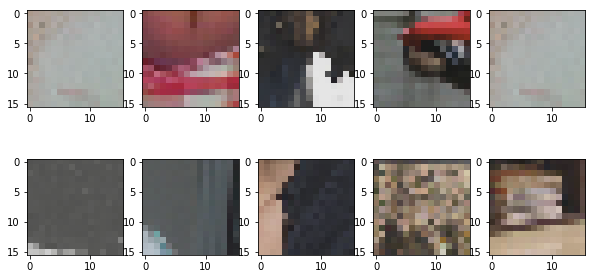

In [65]:
maxs_200 = newron_layer(layer_output_resh=layer_output_4.reshape(200, 1000))
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[maxs_200[i]].reshape(16,16,3))

Странно...

In [66]:
maxs_200

array([ 54,  69, 254, 771,  54, 371, 794, 726, 971, 469, 526, 538, 971,
       869, 870, 771, 571, 854, 469, 971, 971, 526, 771, 338, 971, 254,
       654, 869, 670, 469, 136, 371,  69, 971, 869, 454, 254, 971, 485,
       571, 254, 371, 269, 771, 371,  69, 850, 571, 771,  54,  69, 371,
       669, 469, 571, 971,  54, 936, 571, 571, 469, 454, 470, 388, 371,
       869, 171,  69, 371, 994, 400, 854, 869, 669, 850, 371, 338, 654,
       171, 854,  69, 971, 470, 771, 971, 536, 669, 336, 771, 950, 254,
       469, 771, 136, 171, 371,  69,  69, 171, 469, 454, 171, 469, 971,
       454, 926, 254, 171, 669, 171, 269, 254, 469,  20, 588, 771, 771,
       571, 254, 571,  69, 771, 504, 771, 571, 854, 869, 669, 800, 538,
       269, 171, 371, 654, 669, 971, 171, 371, 254, 771, 454, 571, 869,
        54, 738, 336, 869, 854, 254, 269, 171, 771, 971, 646, 454, 171,
       571, 269, 726, 269, 571, 371, 738, 371, 171, 870, 450, 869, 669,
       854, 971, 270, 269, 654, 269, 254, 454, 270, 171, 869, 66

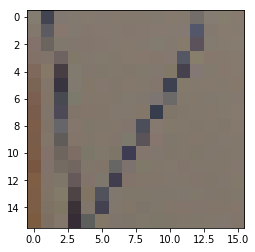

In [67]:
plt.imshow(X_test[978].reshape(16, 16, 3));

Аааа, это такая картинка. Понятно

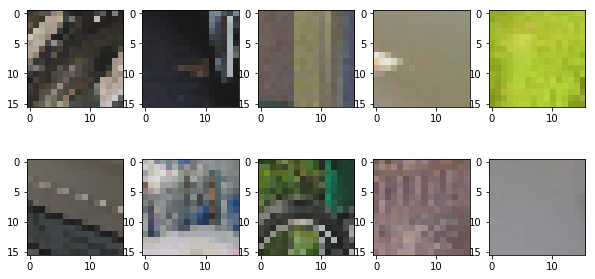

In [68]:
maxs_400 = newron_layer(layer_output_resh=layer_output_5.reshape(400, 1000))
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[maxs_400[i]].reshape(16,16,3))

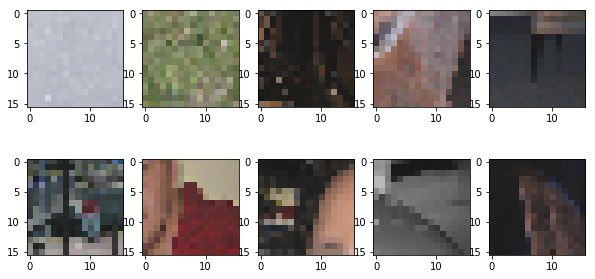

In [69]:
maxs_768 = newron_layer(layer_output_resh=layer_output_6.reshape(768, 1000))
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[maxs_768[i]].reshape(16,16,3))

>Что можете сказать про сложность шаблонов на объектах для каждого слоя?

Трудно что-то сказать про сложность шаблонов, я вывела картинки для всех слоев, и нет такого, что на каком-то слое выделяется только фон, а на каком-то все супер-детально и четко. Вероятно, сложность шаблонов нужно все-таки оценивать по тем сине-желтым квадратикам

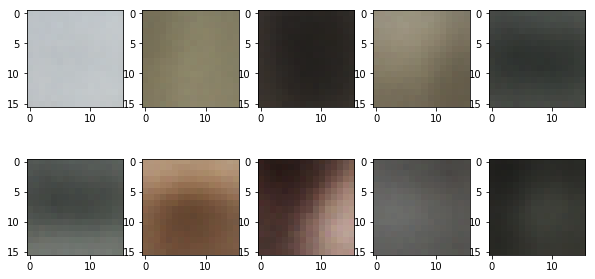

In [70]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(layer_output_6[maxs_768[i]].reshape(16, 16, 3))

Так, ну этот слой пришлось разложить на картинки размерностью 3. Поэтому выведу что-то другое

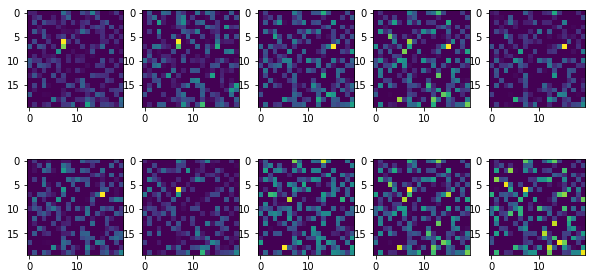

In [71]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(layer_output_5[maxs_400[i]].reshape(20, 20))

Вот. Разве не по этому надо оценивать сложность паттернов? Очевидно, что эти картинки сложнее, чем вот эти:

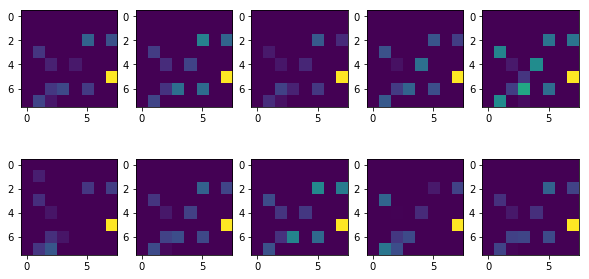

In [72]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(layer_output_3[maxs_64[i]].reshape(8, 8))

### Исследование зависимости качества восстановления от параметров автоэнкодера (1 балл)


Обучите несколько автоэнкодеров с различным количеством слоёв, разными размерами bottleneck'a и сравните, насколько быстро модели обучаются и финальный лосс на валидационной выборке. Какие выводы вы можете сделать?

Вообще я уже обучала. Потому что у меня все ломалось и нужно было посмотреть, в чем причина. В итоге оказалось, что все было ОК, просто невнимательность. Но я уже успела понять, что все зависит от:
* алгоритма оптимизации
* количества эпох (чем больше, тем меньше ошибка)
* размера батча (чем меньше, тем меньше ошибка)

Но теперь надо это заново повторить, да?..
Ну и да, размер bottle_neck я не меняла... Да и количество слоев... Надеюсь, это быстро

Не, ну я все-таки покажу, что от эпох и батча многое зависит

In [73]:
t1 = time()
autoenc.compile(optimizer='adagrad', loss='mean_squared_error', metrics=['mean_squared_error'])
autoenc.fit(X_train, y_train,
                epochs=50,
                batch_size=50,
                shuffle=True,
                validation_data=(X_test, y_test))
t2 = time()

Train on 9000 samples, validate on 1000 samples
Epoch 1/50
9000/9000 [==============================] - 2s - loss: 0.0233 - mean_squared_error: 0.0233 - val_loss: 0.0121 - val_mean_squared_error: 0.0121
Epoch 2/50
9000/9000 [==============================] - 1s - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 3/50
9000/9000 [==============================] - 1s - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0107 - val_mean_squared_error: 0.0107
Epoch 4/50
9000/9000 [==============================] - 1s - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 5/50
9000/9000 [==============================] - 1s - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 6/50
9000/9000 [==============================] - 1s - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 7/50
9000/9000 [

In [74]:
scores = autoenc.evaluate(X_test, y_test)
print("%s: %.2f%%" % (autoenc.metrics_names[1], scores[1]*100))
print("%s: %.2f" % ('Time spent:', t2-t1))

 640/1000 [==================>...........] - ETA: 0smean_squared_error: 0.79%
Time spent:: 98.90


In [75]:
get_6th_layer_output = K.function([autoenc.layers[0].input],
                                  [autoenc.layers[6].output])
layer_output_6 = get_6th_layer_output([X_test])[0]
layer_output_6.shape, layer_output_6.max()

((1000, 768), 0.96396995)

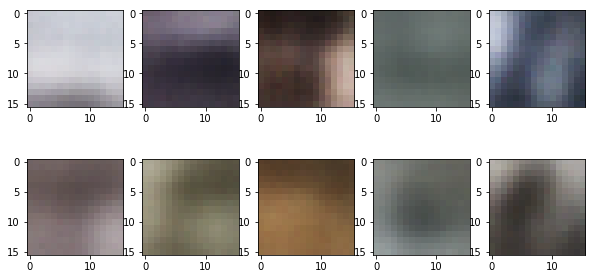

In [76]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(layer_output_6[i].reshape(16, 16, 3))

Если прокрутить вверх, можно увидеть, что похожие картиночки уже были, теперь они более четкие. Если увеличим количество эпох и еще уменьшим размер батча, будет еще круче

In [77]:
from time import time

Изначально у нас были вот такие параметры:
* object_size=768,
* encoder_layer_shapes=[256, 144, 64]
* decoder_layer_shapes=[200, 400]

>Обучите несколько автоэнкодеров с различным количеством слоёв, разными размерами bottleneck'a и сравните, насколько быстро модели обучаются и финальный лосс на валидационной выборке. Какие выводы вы можете сделать?

Ну давайте уберем один слой: самый первый, размерность которого 256

In [78]:
t1 = time()

autoenc_try_1 = create_autoencoder_model(object_size=768, encoder_layer_shapes=[144, 64],
                                   decoder_layer_shapes=[200, 400])
autoenc_try_1.compile(optimizer='adagrad', loss='mean_squared_error', metrics=['mean_squared_error'])
autoenc_try_1.fit(X_train, y_train,
                epochs=50,
                batch_size=50,
                shuffle=True,
                validation_data=(X_test, y_test))
t2 = time()

Train on 9000 samples, validate on 1000 samples
Epoch 1/50
9000/9000 [==============================] - 1s - loss: 0.0434 - mean_squared_error: 0.0434 - val_loss: 0.0253 - val_mean_squared_error: 0.0253
Epoch 2/50
9000/9000 [==============================] - 1s - loss: 0.0185 - mean_squared_error: 0.0185 - val_loss: 0.0157 - val_mean_squared_error: 0.0157
Epoch 3/50
9000/9000 [==============================] - 1s - loss: 0.0130 - mean_squared_error: 0.0130 - val_loss: 0.0119 - val_mean_squared_error: 0.0119
Epoch 4/50
9000/9000 [==============================] - 1s - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0117 - val_mean_squared_error: 0.0117
Epoch 5/50
9000/9000 [==============================] - 1s - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 6/50
9000/9000 [==============================] - 1s - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 7/50
9000/9000 [

In [79]:
scores = autoenc_try_1.evaluate(X_test, y_test)
print("%s: %.2f%%" % (autoenc.metrics_names[1], scores[1]*100))
print("%s: %.2f" % ('Time spent:', t2-t1))

 736/1000 [=====================>........] - ETA: 0smean_squared_error: 0.69%
Time spent:: 86.63


Да, да, я не позаботилась о том, чтобы как-то наглядно выводить рядом время и ошибку предыдущей и следующей модели, поэтому приходится листать вверх и смотреть глазами. Скопирую сюда, так и быть:

640/1000 [==================>...........] - ETA: 0smean_squared_error: 0.82%

Time spent:: 163.43

Время уменьшилосьв 2(!) раза, среднеквадратичная ошибка немного увеличилась. Уберу еще один слой, теперь из декодера.

In [80]:
t1 = time()

autoenc_try_2 = create_autoencoder_model(object_size=768, encoder_layer_shapes=[144, 64],
                                   decoder_layer_shapes=[200])
autoenc_try_2.compile(optimizer='adagrad', loss='mean_squared_error', metrics=['mean_squared_error'])
autoenc_try_2.fit(X_train, y_train,
                epochs=50,
                batch_size=50,
                shuffle=True,
                validation_data=(X_test, y_test))
t2 = time()

Train on 9000 samples, validate on 1000 samples
Epoch 1/50
9000/9000 [==============================] - 1s - loss: 0.0343 - mean_squared_error: 0.0343 - val_loss: 0.0197 - val_mean_squared_error: 0.0197
Epoch 2/50
9000/9000 [==============================] - 1s - loss: 0.0159 - mean_squared_error: 0.0159 - val_loss: 0.0127 - val_mean_squared_error: 0.0127
Epoch 3/50
9000/9000 [==============================] - 0s - loss: 0.0127 - mean_squared_error: 0.0127 - val_loss: 0.0120 - val_mean_squared_error: 0.0120
Epoch 4/50
9000/9000 [==============================] - 1s - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 5/50
9000/9000 [==============================] - 1s - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 6/50
9000/9000 [==============================] - 1s - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 7/50
9000/9000 [

In [81]:
scores = autoenc_try_2.evaluate(X_test, y_test)
print("%s: %.2f%%" % (autoenc.metrics_names[1], scores[1]*100))
print("%s: %.2f" % ('Time spent:', t2-t1))

1000/1000 [==============================] - 0s     
mean_squared_error: 0.78%
Time spent:: 54.13


Времени затратилось столько же, сколько и прежде, а вот ошибка уменьшилась. Довольно странно .-. 

Уберем слой еще разок? Предлагаю сразу 2 - оставить только bottle_neck

In [82]:
t1 = time()

autoenc_try_3 = create_autoencoder_model(object_size=768, encoder_layer_shapes=[64],
                                   decoder_layer_shapes=[])
autoenc_try_3.compile(optimizer='adagrad', loss='mean_squared_error', metrics=['mean_squared_error'])
autoenc_try_3.fit(X_train, y_train,
                epochs=50,
                batch_size=50,
                shuffle=True,
                validation_data=(X_test, y_test))
t2 = time()

Train on 9000 samples, validate on 1000 samples
Epoch 1/50
9000/9000 [==============================] - 0s - loss: 0.0460 - mean_squared_error: 0.0460 - val_loss: 0.0390 - val_mean_squared_error: 0.0390
Epoch 2/50
9000/9000 [==============================] - 0s - loss: 0.0339 - mean_squared_error: 0.0339 - val_loss: 0.0296 - val_mean_squared_error: 0.0296
Epoch 3/50
9000/9000 [==============================] - 0s - loss: 0.0278 - mean_squared_error: 0.0278 - val_loss: 0.0276 - val_mean_squared_error: 0.0276
Epoch 4/50
9000/9000 [==============================] - 0s - loss: 0.0240 - mean_squared_error: 0.0240 - val_loss: 0.0219 - val_mean_squared_error: 0.0219
Epoch 5/50
9000/9000 [==============================] - 0s - loss: 0.0208 - mean_squared_error: 0.0208 - val_loss: 0.0190 - val_mean_squared_error: 0.0190
Epoch 6/50
9000/9000 [==============================] - 0s - loss: 0.0182 - mean_squared_error: 0.0182 - val_loss: 0.0173 - val_mean_squared_error: 0.0173
Epoch 7/50
9000/9000 [

In [83]:
scores = autoenc_try_3.evaluate(X_test, y_test)
print("%s: %.2f%%" % (autoenc.metrics_names[1], scores[1]*100))
print("%s: %.2f" % ('Time spent:', t2-t1))

  32/1000 [..............................] - ETA: 0smean_squared_error: 0.83%
Time spent:: 33.59


Время сократилось почти в 2 раза, а вот ошибка увеличилась.

Нужно еще попробовать разные размеры bottle_neck'a. Предлагаю поизменять модели с единственным внутренним слоем - bottle_neck'ом. Для начала уменьшим его в 2 раза.

In [84]:
t1 = time()

autoenc_try_4 = create_autoencoder_model(object_size=768, encoder_layer_shapes=[32],
                                   decoder_layer_shapes=[])
autoenc_try_4.compile(optimizer='adagrad', loss='mean_squared_error', metrics=['mean_squared_error'])
autoenc_try_4.fit(X_train, y_train,
                epochs=50,
                batch_size=50,
                shuffle=True,
                validation_data=(X_test, y_test))
t2 = time()

Train on 9000 samples, validate on 1000 samples
Epoch 1/50
9000/9000 [==============================] - 0s - loss: 0.0471 - mean_squared_error: 0.0471 - val_loss: 0.0396 - val_mean_squared_error: 0.0396
Epoch 2/50
9000/9000 [==============================] - 0s - loss: 0.0335 - mean_squared_error: 0.0335 - val_loss: 0.0298 - val_mean_squared_error: 0.0298
Epoch 3/50
9000/9000 [==============================] - 0s - loss: 0.0276 - mean_squared_error: 0.0276 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 4/50
9000/9000 [==============================] - 0s - loss: 0.0245 - mean_squared_error: 0.0245 - val_loss: 0.0233 - val_mean_squared_error: 0.0233
Epoch 5/50
9000/9000 [==============================] - ETA: 0s - loss: 0.0221 - mean_squared_error: 0.02 - 0s - loss: 0.0220 - mean_squared_error: 0.0220 - val_loss: 0.0208 - val_mean_squared_error: 0.0208
Epoch 6/50
9000/9000 [==============================] - 0s - loss: 0.0199 - mean_squared_error: 0.0199 - val_loss: 0.0191 - v

In [85]:
scores = autoenc_try_4.evaluate(X_test, y_test)
print("%s: %.2f%%" % (autoenc.metrics_names[1], scores[1]*100))
print("%s: %.2f" % ('Time spent:', t2-t1))

  32/1000 [..............................] - ETA: 0smean_squared_error: 0.97%
Time spent:: 27.10


Ошибка увеличилась, время сократилось примерно на четверть. Теперь наоборот возьмем bottle_neck побольше

In [86]:
t1 = time()

autoenc_try_5 = create_autoencoder_model(object_size=768, encoder_layer_shapes=[128],
                                   decoder_layer_shapes=[])
autoenc_try_5.compile(optimizer='adagrad', loss='mean_squared_error', metrics=['mean_squared_error'])
autoenc_try_5.fit(X_train, y_train,
                epochs=50,
                batch_size=50,
                shuffle=True,
                validation_data=(X_test, y_test))
t2 = time()

Train on 9000 samples, validate on 1000 samples
Epoch 1/50
9000/9000 [==============================] - 1s - loss: 0.0425 - mean_squared_error: 0.0425 - val_loss: 0.0334 - val_mean_squared_error: 0.0334
Epoch 2/50
9000/9000 [==============================] - 0s - loss: 0.0303 - mean_squared_error: 0.0303 - val_loss: 0.0264 - val_mean_squared_error: 0.0264
Epoch 3/50
9000/9000 [==============================] - 0s - loss: 0.0250 - mean_squared_error: 0.0250 - val_loss: 0.0219 - val_mean_squared_error: 0.0219
Epoch 4/50
9000/9000 [==============================] - 0s - loss: 0.0209 - mean_squared_error: 0.0209 - val_loss: 0.0204 - val_mean_squared_error: 0.0204
Epoch 5/50
9000/9000 [==============================] - 0s - loss: 0.0175 - mean_squared_error: 0.0175 - val_loss: 0.0159 - val_mean_squared_error: 0.0159
Epoch 6/50
9000/9000 [==============================] - 0s - loss: 0.0152 - mean_squared_error: 0.0152 - val_loss: 0.0136 - val_mean_squared_error: 0.0136
Epoch 7/50
9000/9000 [

In [87]:
scores = autoenc_try_5.evaluate(X_test, y_test)
print("%s: %.2f%%" % (autoenc.metrics_names[1], scores[1]*100))
print("%s: %.2f" % ('Time spent:', t2-t1))

  32/1000 [..............................] - ETA: 0smean_squared_error: 0.74%
Time spent:: 42.74


Время увеличилось, ошибка уменьшилась, но что-то мне подсказывает, что эта тенденция к уменьшению ошибки - признак переобучения... Ну еще разок в 2 раза увеличу

In [88]:
t1 = time()

autoenc_try_6 = create_autoencoder_model(object_size=768, encoder_layer_shapes=[256],
                                   decoder_layer_shapes=[])
autoenc_try_6.compile(optimizer='adagrad', loss='mean_squared_error', metrics=['mean_squared_error'])
autoenc_try_6.fit(X_train, y_train,
                epochs=50,
                batch_size=50,
                shuffle=True,
                validation_data=(X_test, y_test))
t2 = time()

Train on 9000 samples, validate on 1000 samples
Epoch 1/50
9000/9000 [==============================] - 1s - loss: 0.0421 - mean_squared_error: 0.0421 - val_loss: 0.0325 - val_mean_squared_error: 0.0325
Epoch 2/50
9000/9000 [==============================] - 1s - loss: 0.0293 - mean_squared_error: 0.0293 - val_loss: 0.0254 - val_mean_squared_error: 0.0254
Epoch 3/50
9000/9000 [==============================] - 1s - loss: 0.0241 - mean_squared_error: 0.0241 - val_loss: 0.0215 - val_mean_squared_error: 0.0215
Epoch 4/50
9000/9000 [==============================] - 1s - loss: 0.0200 - mean_squared_error: 0.0200 - val_loss: 0.0216 - val_mean_squared_error: 0.0216
Epoch 5/50
9000/9000 [==============================] - 1s - loss: 0.0171 - mean_squared_error: 0.0171 - val_loss: 0.0210 - val_mean_squared_error: 0.0210
Epoch 6/50
9000/9000 [==============================] - 1s - loss: 0.0146 - mean_squared_error: 0.0146 - val_loss: 0.0133 - val_mean_squared_error: 0.0133
Epoch 7/50
9000/9000 [

In [89]:
scores = autoenc_try_6.evaluate(X_test, y_test)
print("%s: %.2f%%" % (autoenc.metrics_names[1], scores[1]*100))
print("%s: %.2f" % ('Time spent:', t2-t1))

 992/1000 [============================>.] - ETA: 0smean_squared_error: 0.61%
Time spent:: 60.28


Ошибка снова уменьшилась, а вот время увеличилось.
Все-таки мне кажется, что если окошко немаленькое и оно одно, алгоритм будет склонен к переобучению... хм... или наоборот недообучению. Я запуталась, но я помню, что существует совет не выбирать нейросеть, дающую лучшее качество на тестовой выборке, так как если на вход попадет немного (или много) отличающийся объект, все может сломаться. То есть для тестовой выборки может работать, а для новых входных данных - нет. Но мб дело не в этом вообще.

А что если слоев будет больше?

In [90]:
t1 = time()

autoenc_try_7 = create_autoencoder_model(object_size=768, encoder_layer_shapes=[256, 144, 64, 32],
                                   decoder_layer_shapes=[100, 200, 400])
autoenc_try_7.compile(optimizer='adagrad', loss='mean_squared_error', metrics=['mean_squared_error'])
autoenc_try_7.fit(X_train, y_train,
                epochs=50,
                batch_size=50,
                shuffle=True,
                validation_data=(X_test, y_test))
t2 = time()

Train on 9000 samples, validate on 1000 samples
Epoch 1/50
9000/9000 [==============================] - 2s - loss: 0.0310 - mean_squared_error: 0.0310 - val_loss: 0.0206 - val_mean_squared_error: 0.0206
Epoch 2/50
9000/9000 [==============================] - 1s - loss: 0.0208 - mean_squared_error: 0.0208 - val_loss: 0.0202 - val_mean_squared_error: 0.0202
Epoch 3/50
9000/9000 [==============================] - 2s - loss: 0.0198 - mean_squared_error: 0.0198 - val_loss: 0.0187 - val_mean_squared_error: 0.0187
Epoch 4/50
9000/9000 [==============================] - 1s - loss: 0.0180 - mean_squared_error: 0.0180 - val_loss: 0.0180 - val_mean_squared_error: 0.0180
Epoch 5/50
9000/9000 [==============================] - 2s - loss: 0.0166 - mean_squared_error: 0.0166 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 6/50
9000/9000 [==============================] - 2s - loss: 0.0151 - mean_squared_error: 0.0151 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 7/50
9000/9000 [

In [91]:
scores = autoenc_try_7.evaluate(X_test, y_test)
print("%s: %.2f%%" % (autoenc.metrics_names[1], scores[1]*100))
print("%s: %.2f" % ('Time spent:', t2-t1))

 704/1000 [====================>.........] - ETA: 0smean_squared_error: 0.94%
Time spent:: 100.96


Однозначно можно сделать вывод, что количество слоев влияет на время: чем их больше, тем дольше обучается. Но зависимость есть и от размера слоев.

# Классификация MNIST и CIFAR (3,5 балла)

### MNIST (2 балла)

Загрузите датасет MNIST и провизуализируйте несколько цифр.

In [92]:
from keras.datasets import mnist
(X_train_mnist, y_train_mnist), (X_test_mnist, y_test_mnist) = mnist.load_data()

In [93]:
X_train_mnist.shape, X_test_mnist.shape, y_train_mnist.shape, y_test_mnist.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

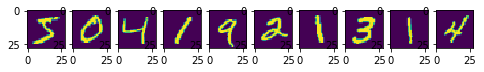

In [94]:
plt.figure(figsize=(8, 4))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X_train_mnist[i])

### Нормализуем картиночки

In [95]:
X_train_mnist = X_train_mnist.astype('float32')
X_test_mnist = X_test_mnist.astype('float32')

X_train_mnist /= 255
X_test_mnist /= 255

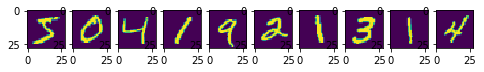

In [96]:
plt.figure(figsize=(8, 4))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X_train_mnist[i])

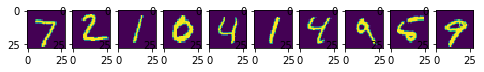

In [97]:
plt.figure(figsize=(8, 4))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X_test_mnist[i])

In [98]:
y_train_mnist[0]

5

In [99]:
y_train_mnist[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

Сожмите данные автокодировщиком, у которого только один скрытый слой(по сути только bottleneck) с 30 нейронами.

In [100]:
X_train_mnist = X_train_mnist.reshape(60000, 784)
X_test_mnist = X_test_mnist.reshape(10000, 784)

In [101]:
mnist_autoenc, mnist_enc, mnist_dec = create_autoencoder_model_common(object_size=784, encoder_layer_shapes=[30],
                                                                      decoder_layer_shapes=[])

In [102]:
mnist_autoenc.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 784)               0         
_________________________________________________________________
encoder (Model)              (None, 30)                23550     
_________________________________________________________________
decoder (Model)              (None, 784)               24304     
Total params: 47,854
Trainable params: 47,854
Non-trainable params: 0
_________________________________________________________________


In [103]:
mnist_enc.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 30)                23550     
Total params: 23,550
Trainable params: 23,550
Non-trainable params: 0
_________________________________________________________________


In [104]:
mnist_dec.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 30)                0         
_________________________________________________________________
dense_51 (Dense)             (None, 784)               24304     
Total params: 24,304
Trainable params: 24,304
Non-trainable params: 0
_________________________________________________________________


Хотя тут же всего 3 слоя... Наверное можно было другой функцией обойтись

In [105]:
mnist_autoencoder = create_autoencoder_model(object_size=784, encoder_layer_shapes=[30], decoder_layer_shapes=[])

In [106]:
mnist_autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_53 (Dense)             (None, 784)               24304     
Total params: 47,854
Trainable params: 47,854
Non-trainable params: 0
_________________________________________________________________


In [107]:
t1 = time()

mnist_autoencoder.compile(optimizer='adagrad', loss='mean_squared_error', metrics=['mean_squared_error'])
mnist_autoencoder.fit(X_train_mnist, X_train_mnist,
                      epochs=50,
                      batch_size=50,
                      shuffle=True,
                      validation_data=(X_test_mnist, X_test_mnist))
t2 = time()

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s - loss: 0.0329 - mean_squared_error: 0.0329 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 2/50
60000/60000 [==============================] - 3s - loss: 0.0228 - mean_squared_error: 0.0228 - val_loss: 0.0205 - val_mean_squared_error: 0.0205
Epoch 3/50
60000/60000 [==============================] - 3s - loss: 0.0196 - mean_squared_error: 0.0196 - val_loss: 0.0181 - val_mean_squared_error: 0.0181
Epoch 4/50
60000/60000 [==============================] - 3s - loss: 0.0177 - mean_squared_error: 0.0177 - val_loss: 0.0166 - val_mean_squared_error: 0.0166
Epoch 5/50
60000/60000 [==============================] - 3s - loss: 0.0164 - mean_squared_error: 0.0164 - val_loss: 0.0155 - val_mean_squared_error: 0.0155
Epoch 6/50
60000/60000 [==============================] - 3s - loss: 0.0155 - mean_squared_error: 0.0155 - val_loss: 0.0148 - val_mean_squared_error: 0.0148
Epoch 7/

In [108]:
scores = mnist_autoencoder.evaluate(X_test_mnist, X_test_mnist)
print("%s: %.2f%%" % (autoenc.metrics_names[1], scores[1]*100))
print("%s: %.2f" % ('Time spent:', t2-t1))

 9856/10000 [============================>.] - ETA: 0smean_squared_error: 1.08%
Time spent:: 184.09


In [109]:
get_mnist_layer_output = K.function([mnist_autoencoder.layers[0].input],
                                  [mnist_autoencoder.layers[1].output])
layer_output_mnist = get_mnist_layer_output([X_test_mnist])[0]
layer_output_mnist.shape, layer_output_mnist.max()

((10000, 30), 44.100624)

Не представляю, как это визуализировать, а хотелось бы :( Но ничего, сделаю это со следующим слоем

In [110]:
get_mnist_layer_output_1 = K.function([mnist_autoencoder.layers[0].input],
                                  [mnist_autoencoder.layers[2].output])
layer_output_mnist_1 = get_mnist_layer_output_1([X_test_mnist])[0]
layer_output_mnist_1.shape, layer_output_mnist_1.max()

((10000, 784), 0.99993455)

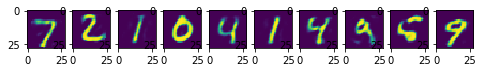

In [111]:
plt.figure(figsize=(8, 4))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(layer_output_mnist_1[i].reshape(28, 28))

Ну да, вроде все ок восстановилось

Интересующий нас слой - layer_output_mnist

In [112]:
layer_output_mnist.shape

(10000, 30)

Так, надо было не только для тестовой выборки, видимо

In [113]:
layer_output_mnist_test = layer_output_mnist

In [114]:
get_mnist_layer_output = K.function([mnist_autoencoder.layers[0].input],
                                  [mnist_autoencoder.layers[1].output])
layer_output_mnist_train = get_mnist_layer_output([X_train_mnist])[0]
layer_output_mnist_train.shape, layer_output_mnist_train.max()

((60000, 30), 45.201542)

In [115]:
X_train_mnist.shape, X_test_mnist.shape, y_train_mnist.shape, y_test_mnist.shape, layer_output_mnist_train.shape, layer_output_mnist_test.shape

((60000, 784), (10000, 784), (60000,), (10000,), (60000, 30), (10000, 30))

Возьмите несколько моделей из sklearn (KNN,SVM, RandomForest, GradientBoosting/XGBClassifier) и обучите модель со стандартными параметрами на выходах энкодера. Какие у вас получились результаты(точность) на тесте?

In [116]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score

In [117]:
kNN = KNeighborsClassifier()
SVC = SVC()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()

In [118]:
#KNeighborsClassifier
y_pred_mnist = kNN.fit(layer_output_mnist_train, y_train_mnist).predict(layer_output_mnist_test)
accuracy_kNN = accuracy_score(y_test_mnist, y_pred_mnist)

In [119]:
#SVC
y_pred_mnist = SVC.fit(layer_output_mnist_train, y_train_mnist).predict(layer_output_mnist_test)
accuracy_SVC = accuracy_score(y_test_mnist, y_pred_mnist)

In [120]:
#RandomForestClassifier
y_pred_mnist = rf.fit(layer_output_mnist_train, y_train_mnist).predict(layer_output_mnist_test)
accuracy_rf = accuracy_score(y_test_mnist, y_pred_mnist)

In [121]:
#GradientBoostingClassifier
y_pred_mnist = gb.fit(layer_output_mnist_train, y_train_mnist).predict(layer_output_mnist_test)
accuracy_gb = accuracy_score(y_test_mnist, y_pred_mnist)

In [122]:
print('Accuracy score for models')
print('KNeighborsClassifier:', accuracy_kNN)
print('SVC:', accuracy_SVC)
print('RandomForestClassifier:', accuracy_rf)
print('GradientBoostingClassifier', accuracy_gb)

Accuracy score for models
KNeighborsClassifier: 0.9673
SVC: 0.6278
RandomForestClassifier: 0.9139
GradientBoostingClassifier 0.9165


Так долго обучался и такое качество!!!!!!!

Я негодую!!!!!

### CIFAR10(2 балла)

Загрузите CIFAR10 и обучите автоэнкодер на случайных сэмплах размера 8x8 из этого датасета. Архитектура автоэнкодера как в прошлом пункте - только один внутренний слой из 30 нейронов.

In [123]:
from keras.datasets import cifar10

In [124]:
(X_train_cifar10, y_train_cifar10), (X_test_cifar10, y_test_cifar10) = cifar10.load_data()

In [125]:
X_train_cifar10.shape, X_test_cifar10.shape, y_train_cifar10.shape, y_test_cifar10.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

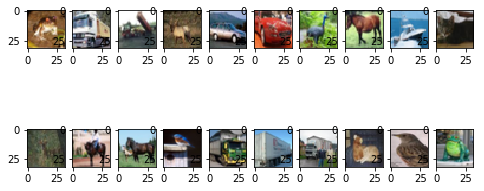

In [126]:
plt.figure(figsize=(8, 4))
for i in range(20):
    plt.subplot(2, 10, i + 1)
    plt.imshow(X_train_cifar10[i])

In [127]:
y_train_cifar10[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [128]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0.1,0.9))

transformed_X_train_cifar10 = []

for img in range(len(X_train_cifar10)):
    original_image = X_train_cifar10[img, :, :, :]
    as_columns = original_image.reshape(-1, 3)
    t = scaler.fit_transform(as_columns)
    transformed_image = t.reshape(original_image.shape)
    transformed_X_train_cifar10.append(transformed_image)

/Users/andrey_lukyanov/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


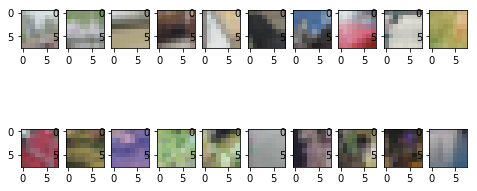

In [129]:
cifar10_samples = get_samples(transformed_X_train_cifar10, num_samples=50000, sample_size=8, rand_seed=42)
plt.figure(figsize=(8, 4))
for i in range(20):
    plt.subplot(2, 10, i + 1)
    plt.imshow(cifar10_samples[i])

In [130]:
cifar10_samples.shape

(50000, 8, 8, 3)

In [131]:
cifar10_samples = cifar10_samples.reshape(50000, 8*8*3)
cifar10_samples.shape

(50000, 192)

In [132]:
RANDOM_STATE = 42
from sklearn.model_selection import train_test_split
X_train_cifar10_samples, X_test_cifar10_samples, y_train_cifar10_samples, y_test_cifar10_samples = train_test_split(
    cifar10_samples, cifar10_samples, test_size=0.1, random_state=RANDOM_STATE)

In [133]:
X_train_cifar10_samples.shape, X_test_cifar10_samples.shape, y_train_cifar10_samples.shape, y_test_cifar10_samples.shape

((45000, 192), (5000, 192), (45000, 192), (5000, 192))

In [134]:
from time import time
t1 = time()

cifar10_autoencoder = create_autoencoder_model(object_size=192, encoder_layer_shapes=[30], decoder_layer_shapes=[])
cifar10_autoencoder.compile(optimizer='adagrad', loss='mean_squared_error', metrics=['mean_squared_error'])
cifar10_autoencoder.fit(X_train_cifar10_samples, y_train_cifar10_samples,
                epochs=50,
                batch_size=50,
                shuffle=True,
                validation_data=(X_test_cifar10_samples, y_test_cifar10_samples))
t2 = time()

Train on 45000 samples, validate on 5000 samples
Epoch 1/50
45000/45000 [==============================] - 1s - loss: 0.0208 - mean_squared_error: 0.0208 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 2/50
45000/45000 [==============================] - 1s - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0071 - val_mean_squared_error: 0.0071
Epoch 3/50
45000/45000 [==============================] - 1s - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0059 - val_mean_squared_error: 0.0059
Epoch 4/50
45000/45000 [==============================] - 1s - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.0054 - val_mean_squared_error: 0.0054
Epoch 5/50
45000/45000 [==============================] - 1s - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0048 - val_mean_squared_error: 0.0048
Epoch 6/50
45000/45000 [==============================] - 1s - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.0046 - val_mean_squared_error: 0.0046
Epoch 7/5

In [135]:
scores = cifar10_autoencoder.evaluate(X_test_cifar10_samples, y_test_cifar10_samples)
print("%s: %.2f%%" % (cifar10_autoencoder.metrics_names[1], scores[1]*100))
print("%s: %.2f" % ('Time spent:', t2-t1))

4704/5000 [===========================>..] - ETA: 0smean_squared_error: 0.28%
Time spent:: 85.59


In [136]:
cifar10_autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        (None, 192)               0         
_________________________________________________________________
dense_54 (Dense)             (None, 30)                5790      
_________________________________________________________________
dense_55 (Dense)             (None, 192)               5952      
Total params: 11,742
Trainable params: 11,742
Non-trainable params: 0
_________________________________________________________________


In [137]:
from keras import backend as K
get_cifar10_layer_output = K.function([cifar10_autoencoder.layers[0].input],
                                  [cifar10_autoencoder.layers[2].output])
layer_output_cifar10 = get_cifar10_layer_output([X_test_cifar10_samples])[0]
layer_output_cifar10.shape, layer_output_cifar10.max()

((5000, 192), 0.94039929)

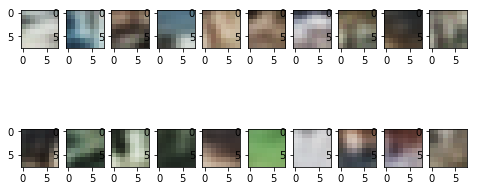

In [138]:
plt.figure(figsize=(8, 4))
for i in range(20):
    plt.subplot(2, 10, i + 1)
    plt.imshow(layer_output_cifar10[i].reshape(8, 8, 3))

Теперь разделите каждую картинку из датасета на 16 сэмплjd размера 8x8, закодируйте их через энкодер и склейте 16 выходов энкодера в один вектор. Каждый объект в итоге должен кодироваться 16 * 30 = 380 признаками.

In [139]:
from numpy.random import randint
def create_cifar10_samples(cifar10_images, num_samples, sample_size):
    cifar10_parts = []    
    for img in cifar10_images:
        boundary_1 = img.shape[0] - sample_size
        boundary_2 = img.shape[1] - sample_size
        for i in range(num_samples):
            w1 = randint(0, boundary_1, size=None)
            w2 = w1 + sample_size
            h1 = randint(0, boundary_2, size=None)
            h2 = h1 + sample_size
            part = img[w1:w2, h1:h2]
            cifar10_parts.append(part)
    return np.asarray(cifar10_parts)  

In [148]:
new_samples_train = create_cifar10_samples(cifar10_images=X_train_cifar10, num_samples=16, sample_size=8)
new_samples_test = create_cifar10_samples(cifar10_images=X_test_cifar10, num_samples=16, sample_size=8)
new_samples_train.shape, new_samples_test.shape

((800000, 8, 8, 3), (160000, 8, 8, 3))

In [149]:
new_samples_train = new_samples_train.reshape(800000, 192)
new_samples_test = new_samples_test.reshape(160000, 192)
new_samples_train.shape, new_samples_test.shape

((800000, 192), (160000, 192))

In [150]:
from time import time
t1 = time()

cifar10_autoencoder_2 = create_autoencoder_model(object_size=192, encoder_layer_shapes=[30], decoder_layer_shapes=[])
cifar10_autoencoder_2.compile(optimizer='adagrad', loss='mean_squared_error', metrics=['mean_squared_error'])
cifar10_autoencoder_2.fit(new_samples_train, new_samples_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(new_samples_test, new_samples_test))
t2 = time()

Train on 800000 samples, validate on 160000 samples
Epoch 1/50
800000/800000 [==============================] - 11s - loss: 17875.0622 - mean_squared_error: 17875.0622 - val_loss: 18085.5759 - val_mean_squared_error: 18085.5759
Epoch 2/50
800000/800000 [==============================] - 10s - loss: 17874.6947 - mean_squared_error: 17874.6947 - val_loss: 18085.5758 - val_mean_squared_error: 18085.5758
Epoch 3/50
800000/800000 [==============================] - 10s - loss: 17874.6946 - mean_squared_error: 17874.6946 - val_loss: 18085.5758 - val_mean_squared_error: 18085.5758
Epoch 4/50
800000/800000 [==============================] - 10s - loss: 17874.6947 - mean_squared_error: 17874.6947 - val_loss: 18085.5758 - val_mean_squared_error: 18085.5758
Epoch 5/50
800000/800000 [==============================] - 10s - loss: 17874.6946 - mean_squared_error: 17874.6946 - val_loss: 18085.5758 - val_mean_squared_error: 18085.5758
Epoch 6/50
800000/800000 [==============================] - 10s - lo

In [151]:
cifar10_autoencoder_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        (None, 192)               0         
_________________________________________________________________
dense_56 (Dense)             (None, 30)                5790      
_________________________________________________________________
dense_57 (Dense)             (None, 192)               5952      
Total params: 11,742
Trainable params: 11,742
Non-trainable params: 0
_________________________________________________________________


In [152]:
get_cifar10_layer_output_2 = K.function([cifar10_autoencoder_2.layers[0].input],
                                  [cifar10_autoencoder_2.layers[1].output])
layer_output_cifar10_2_train = get_cifar10_layer_output_2([new_samples_train])[0]
layer_output_cifar10_2_test = get_cifar10_layer_output_2([new_samples_test])[0]
layer_output_cifar10_2_train.shape, layer_output_cifar10_2_test.shape

((800000, 30), (160000, 30))

In [153]:
encoded_samples_train = layer_output_cifar10_2_train.reshape(int(len(layer_output_cifar10_2_train)/16), 480)
encoded_samples_test = layer_output_cifar10_2_test.reshape(int(len(layer_output_cifar10_2_test)/16), 480)
encoded_samples_train.shape, encoded_samples_test.shape

((50000, 480), (10000, 480))

Теперь обучите SVM на преобразованных объектах и выведите точность.

In [154]:
from sklearn.svm import SVC

In [155]:
 y_train_cifar10.shape, y_test_cifar10.shape

((50000, 1), (10000, 1))

In [156]:
y_train_cifar10 = y_train_cifar10.reshape(50000,)
y_test_cifar10 = y_test_cifar10.reshape(10000,)

In [157]:
#SVC
SVC = SVC()
y_pred_cifar10 = SVC.fit(encoded_samples_train[:10000], y_train_cifar10[:10000]).predict(encoded_samples_test)
accuracy_SVC = accuracy_score(y_test_cifar10, y_pred_cifar10)

In [158]:
accuracy_SVC

0.10000000000000001

Довольно низкая точность, возможно из-за размера выборки, но комп не переваривает выборку больше.